## <center> Machine learning : Classification 

In [3]:
# import important libraries : 
import numpy as np
import matplotlib.pyplot as plt

## 1. Perceptron :

### 1.1 Theory : 

Let the training data $S = \{ (x_1, y_i) \}_{i=0}^{m}$, where $x_i \in \mathbb{R}^d$ and $y_i \in \{-1, 1\}$

<u><b>The purpose :</b></u> 

Is to find a classifier $h_s$, in the perceptron algorithm : 

$$ h_s(x) = sign(w^T.x) = \begin{cases}
                            \text{1, if $w^T.x > 0$} \\
                            \text{-1, if $w^T.x < 0$}
                        \end{cases}$$

> Note :
> 
> $w \in \mathbb{R}^{d+1}$, because we include the bias $w_0$, by including $1$ in sample $x = [1, x_1, ..., x_d ]$

Let define the Loss function, in classification problems, specially in Perceptron, we consider:

$$ ERM(S, w) = \sum_{i = 1}^{m} \mathbb{1}_{[h_s(x_i) \neq y_i]}(x_i)$$

where the $\mathbb{1}$ function defined as : 

$$ \mathbb{1}_{[h_s(x) \neq y]}(x)  = \begin{cases}
                                        \text{1,  if $h_s(x) \neq y$} \\
                                        \text{0,  if $h_s(x) = y$}
                                    \end{cases}$$

### 1.2 prepare data : 

In [49]:
sep_data = np.loadtxt("./sep_data.csv", delimiter=',')

In [53]:
X_train, y_train = sep_data[:, :-1], sep_data[:, -1]

In [100]:
X_train[:10]

array([[1.        , 5.56755988, 6.22992502],
       [1.        , 2.85008898, 1.75119824],
       [1.        , 1.79074318, 2.96115958],
       [1.        , 7.0824643 , 6.62574582],
       [1.        , 1.92239567, 0.91431743],
       [1.        , 5.15890362, 5.56996509],
       [1.        , 2.45192085, 2.18743356],
       [1.        , 2.57946292, 2.60054841],
       [1.        , 0.386485  , 1.50348458],
       [1.        , 5.71250619, 5.91346478]])

In [97]:
# print the X_train shape : 
X_train.shape

(240, 3)

The `X_train` has two features, the first column is added just for include the intercept in $w$ weights.

In [54]:
y_train

array([ 1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,
        1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,
        1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,
        1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,
        1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
       -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,
        1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1

### 1.3 Visualize data : 

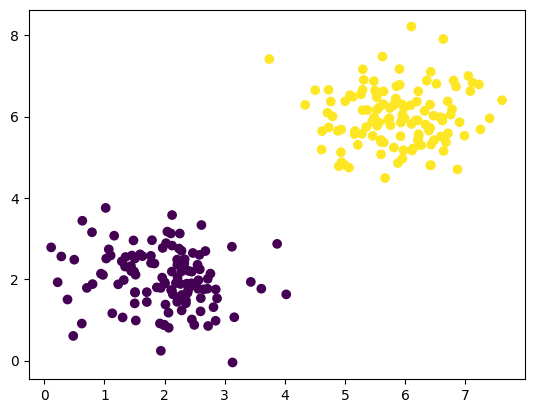

In [55]:
plt.scatter(X_train[:, 1], X_train[:, 2], marker="o", c=y_train)

### 1.4 Build model : 

In [272]:
class Perceptron:
    
    def __init__(self):

        self.w : np.ndarray 
        self.lossHist : list = []

    def fit(self, X, y):
        m , d = X.shape
        self.w = np.random.rand(d)
        
        self.lossHist.append(self.loss(X, y))

        loss = self.loss(X, y)

        t = 0
        
        while(loss != 0):
            for i, xi in enumerate(X):
                if self.hs(xi)*y[i] < 0: 
                    self.w += y[i] * xi
                    loss = self.loss(X, y)

                t += 1                
                if t%10 ==0:
                    self.lossHist.append(loss)
                    print(f"iter : {t} ,loss : {loss}")
                    if loss == 0: break
    
    def predict(self, x):
        return self.hs(x)
                
    def loss(self, X, y):
        return (1/len(X)) * sum(0 if self.hs(xi) == y[i] else 1 for i, xi in enumerate(X))

    def hs(self, xi):
        return np.sign(self.w @ xi)

    def summary(self):
        print("======== Perceptron model summary : ", "="*50)
        print(f" weights : {per.w}")
        print(f" loss : {per.loss(X_train, y_train)}")
        print(f"\nplot the loss : ")
        plt.plot(range(0, len(self.lossHist)), self.lossHist) 

In [278]:
# create perceptron model
per = Perceptron()

In [279]:
# train Perceptron model :
per.fit(X_train, y_train)

iter : 10 ,loss : 0.5
iter : 20 ,loss : 0.4666666666666667
iter : 30 ,loss : 0.4875
iter : 40 ,loss : 0.5
iter : 50 ,loss : 0.4583333333333333
iter : 60 ,loss : 0.49583333333333335
iter : 70 ,loss : 0.13333333333333333
iter : 80 ,loss : 0.13333333333333333
iter : 90 ,loss : 0.016666666666666666
iter : 100 ,loss : 0.016666666666666666
iter : 110 ,loss : 0.016666666666666666
iter : 120 ,loss : 0.016666666666666666
iter : 130 ,loss : 0.016666666666666666
iter : 140 ,loss : 0.016666666666666666
iter : 150 ,loss : 0.016666666666666666
iter : 160 ,loss : 0.475
iter : 170 ,loss : 0.48333333333333334
iter : 180 ,loss : 0.008333333333333333
iter : 190 ,loss : 0.008333333333333333
iter : 200 ,loss : 0.008333333333333333
iter : 210 ,loss : 0.008333333333333333
iter : 220 ,loss : 0.008333333333333333
iter : 230 ,loss : 0.008333333333333333
iter : 240 ,loss : 0.008333333333333333
iter : 250 ,loss : 0.008333333333333333
iter : 260 ,loss : 0.008333333333333333
iter : 270 ,loss : 0.008333333333333333


> **Note** :
> 
>$w = [w_0, w_1, w_2]$  where the $w_0$ is the intercept.

In [280]:
# print the weigth of the perceptron model : 
per.w 

array([-18.13053866,   1.72737583,   2.27960671])

In [281]:
len(per.lossHist)

35

======== Perceptron model summary :  ==================================================
 weights : [-18.13053866   1.72737583   2.27960671]
 loss : 0.0

plot the loss : 


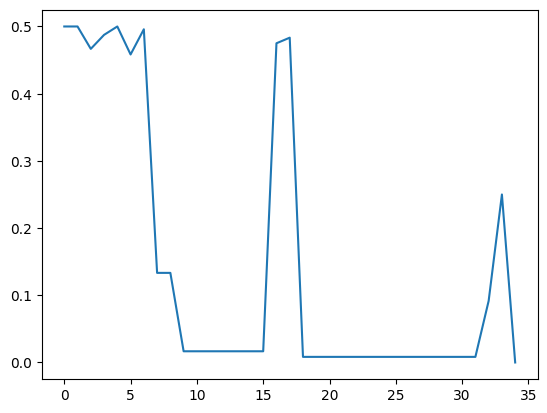

In [282]:
per.summary()

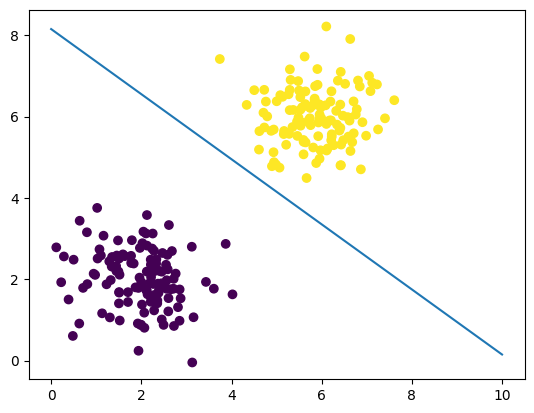

In [253]:
t = np.linspace(0, 10, 100)
y_line = - (per.w[0] + t * per.w[1])/per.w[2] 
plt.scatter(X_train[:, 1], X_train[:, 2], marker="o", c=y_train)
plt.plot(t, y_line)